In [17]:
import pandas as pd #importing pandas
import numpy as np #importing numpy
import seaborn as sns #importing seaborn
import matplotlib.pyplot as plt #importing matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import svm

In [18]:
diabetes = pd.read_csv("K:\DATA SCIENCE\DataSets\diabetes.csv")

In [19]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Outcome 1 means test positive for diabetes and 0 means negative.

In [20]:
diabetes.shape

(768, 9)

In [21]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking for zero values in data.

In [24]:
print(diabetes[diabetes['BloodPressure']==0].shape[0])
print(diabetes[diabetes['Glucose']==0].shape[0])
print(diabetes[diabetes['SkinThickness']==0].shape[0])
print(diabetes[diabetes['Insulin']==0].shape[0])
print(diabetes[diabetes['BMI']==0].shape[0])
print(diabetes[diabetes['Age']==0].shape[0])

35
5
227
374
11
0


We will plot histogram for each parameter to see if data is distributed or skewed

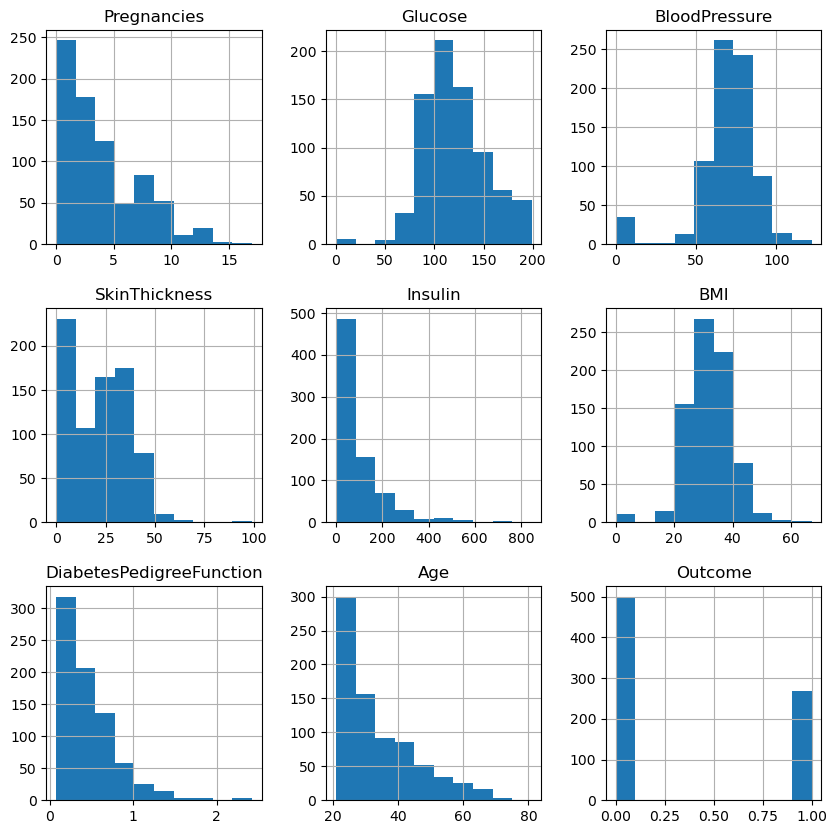

In [25]:
diabetes.hist(bins=10,figsize=(10,10))
plt.show()

In [26]:
diabetes['Glucose']=diabetes['Glucose'].replace(0,diabetes['Glucose'].mean())#normal distribution
diabetes['BloodPressure']=diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].mean())#normal distribution
diabetes['SkinThickness']=diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].median())#skewed distribution
diabetes['Insulin']=diabetes['Insulin'].replace(0,diabetes['Insulin'].median())#skewed distribution
diabetes['BMI']=diabetes['BMI'].replace(0,diabetes['BMI'].median())#skewed distribution

In [27]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

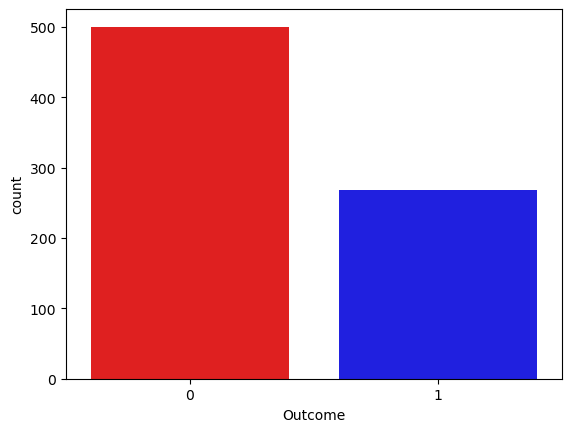

In [28]:
sns.countplot(x=diabetes.Outcome,palette=['r','b'])

<Axes: >

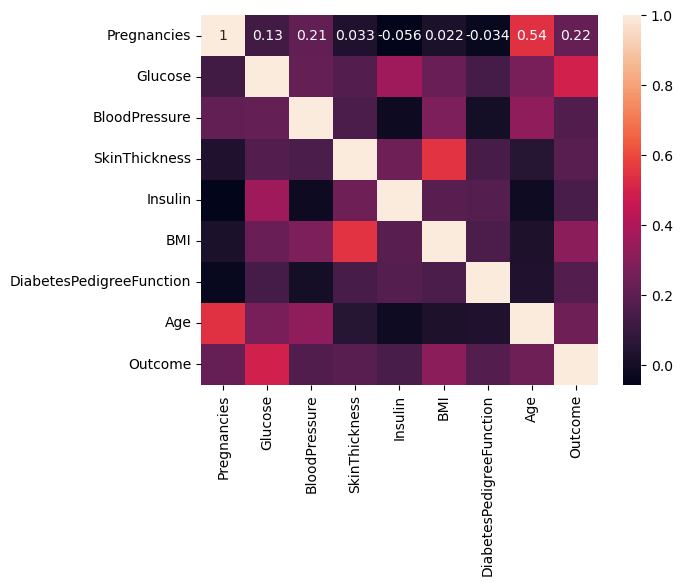

In [29]:
corrmat=diabetes.corr()
sns.heatmap(corrmat, annot=True)

In [31]:
corrmat['Outcome']

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [33]:
scaler = StandardScaler()

In [34]:
X = diabetes.drop('Outcome', axis = 1)
Y = diabetes['Outcome']

In [35]:
X,Y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6    148.0           72.0             35     30.5  33.6   
 1              1     85.0           66.0             29     30.5  26.6   
 2              8    183.0           64.0             23     30.5  23.3   
 3              1     89.0           66.0             23     94.0  28.1   
 4              0    137.0           40.0             35    168.0  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10    101.0           76.0             48    180.0  32.9   
 764            2    122.0           70.0             27     30.5  36.8   
 765            5    121.0           72.0             23    112.0  26.2   
 766            1    126.0           60.0             23     30.5  30.1   
 767            1     93.0           70.0             31     30.5  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [38]:
X_train ,X_test

(array([[-0.85811767,  0.04807785,  0.13948964, ..., -0.66024761,
         -1.10316947, -0.27704152],
        [-0.85811767, -0.8985756 ,  0.80539067, ...,  0.40098808,
         -0.71238555,  0.84376203],
        [-1.15412006, -0.93121882, -0.19346087, ...,  1.65383576,
         -0.37742791, -1.05298243],
        ...,
        [ 0.02988949,  0.08072108, -0.19346087, ..., -0.49811438,
          1.96433735,  1.01619334],
        [-0.2661129 , -0.21306793,  0.13948964, ..., -0.88133837,
         -1.08260189, -0.79433546],
        [ 0.02988949, -0.40892726, -0.52641138, ..., -0.05593284,
         -0.01308802, -0.36325717]]),
 array([[-0.49172884, -1.03486366,  0.1621009 , ..., -0.57709381,
         -0.78563083, -0.91938236],
        [-0.49172884,  0.36497019,  0.96384044, ..., -0.71667674,
         -0.59662063, -0.51439128],
        [-1.09512519, -0.55687161,  0.48279671, ...,  0.19061227,
         -0.75470189, -0.75738593],
        ...,
        [-1.09512519,  0.46739706,  0.48279671, ..., -

# SVM

In [39]:
classify = svm.SVC(kernel='linear')

In [40]:
classify.fit(X_train,Y_train)

SVC(kernel='linear')

In [41]:
pred_svm = classify.predict(X_test)

In [42]:
confusion_matrix(Y_test, pred_svm)

array([[93, 16],
       [21, 24]], dtype=int64)

In [43]:
cm = accuracy_score(Y_test, pred_svm)*100
cm

75.97402597402598

lets test the model



Lets input the data

In [44]:
input = np.array([5,166,72,19,175,25.8,0.587,51])

In [45]:
print(input)

[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]


In [46]:
input_reshaped = input.reshape(1,-1)

In [47]:
print(input_reshaped)

[[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]]


In [48]:
print(classify.predict(input_reshaped))

[1]


As we can see it has predicted the outcome